<a class="anchor" id="0"></a>
# **kNN Classifier Tutorial in Python**


Hello friends,

kNN (k-Nearest Neighbours) là một thuật toán học máy rất đơn giản và dễ hiểu. Trong bài viết này, tôi sẽ xây dựng một mô hình kNN để phân loại bệnh nhân mắc ung thư vú.

So, let's get started.


<a class="anchor" id="0.1"></a>
# **Table of Contents**


1. [Introduction to k Nearest Neighbours Algorithm](#1)
2. [k Nearest Neighbours intuition](#2)
3. [How to decide the number of neighbours in kNN](#3)
4. [Eager learners vs lazy learners](#4)
5. [Import libraries](#5)
6. [Import dataset](#6)
7. [Exploratory data analysis](#7)
8. [Data visualization](#8)
9. [Declare feature vector and target variable](#9)
10. [Split data into separate training and test set](#10)
11.	[Feature engineering](#11)
12.	[Feature scaling](#12)
13.	[Fit Neighbours classifier to the training set](#13)
14.	[Predict the test-set results](#14)
15.	[Check the accuracy score](#15)
16.	[Rebuild kNN classification model using different values of k](#16)
17.	[Confusion matrix](#17)
18.	[Classification metrices](#18)
19.	[ROC - AUC](#19)
20.	[k-Fold Cross Validation](#20)
21.	[Results and conclusion](#21)
22. [References](#22)


# **1. Introduction to k Nearest Neighbours algorithm** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)


Trong học máy, k Nearest Neighbours (kNN) là một trong những thuật toán đơn giản nhất. Đây là một thuật toán phi tham số được sử dụng cho cả bài toán phân loại và hồi quy. “Phi tham số” có nghĩa là thuật toán không yêu cầu bất kỳ giả định nào về phân phối dữ liệu.

Trong cả hai nhiệm vụ **phân loại** và **hồi quy**, đầu vào bao gồm k điểm dữ liệu gần nhất trong không gian đặc trưng. Đầu ra sẽ phụ thuộc vào việc kNN được sử dụng để phân loại hay hồi quy:
**Với phân loại** , kết quả sẽ là nhãn của nhóm chiếm đa số trong k điểm gần nhất.

**Với hồi quy**, kết quả là trung bình (hoặc giá trị trung vị) của các điểm lân cận.

-	Trong phân loại bằng kNN, đầu ra là **nhãn lớp** của điểm dữ liệu. Điểm dữ liệu được **phân loại **dựa trên loại nhãn chiếm đa số trong số các điểm lân cận của nó. Cụ thể, điểm dữ liệu sẽ được gán vào lớp xuất hiện nhiều nhất trong k điểm gần nhất.

Thông thường, k là một số nguyên dương nhỏ. Nếu k = 1, thì điểm dữ liệu sẽ được gán trực tiếp vào lớp của điểm gần nhất duy nhất.

-	Trong hồi quy kNN, đầu ra là một **giá trị số** đại diện cho thuộc tính của đối tượng. Giá trị này được tính bằng **trung bình** của các giá trị thuộc k điểm lân cận gần nhất.


kNN là một dạng học **dựa trên ví dụ** (instance-based learning) hay còn gọi là **học lười biếng** (lazy learning). Điều này có nghĩa là không cần **giai đoạn huấn luyện trước** khi đưa ra dự đoán. Toàn bộ dữ liệu huấn luyện sẽ được sử dụng trực tiếp trong giai đoạn kiểm tra (testing), làm cho **quá trình huấn luyện nhanh** hơn nhưng kiểm tra chậm hơn và tốn nhiều tài nguyên hơn (thời gian và bộ nhớ).

Trong kNN, các điểm lân cận được lấy từ một tập hợp dữ liệu có **nhãn hoặc giá trị** thuộc tính đã biết, có thể coi như tập huấn luyện. Tuy không có bước huấn luyện rõ ràng, nhưng trong cả phân loại và hồi quy, thuật toán kNN có thể gán **trọng số** cho các điểm lân cận. Các điểm gần hơn sẽ có ảnh hưởng lớn hơn đến kết quả so với các điểm ở xa hơn.



# **2. k Nearest Neighbours intuition** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)

Thuật toán trực giác kNN rất dễ hiểu. Nó chỉ tính toán khoảng cách giữa một điểm dữ liệu mẫu và tất cả các điểm dữ liệu đào tạo khác. Khoảng cách có thể là khoảng cách Euclidean hoặc khoảng cách Manhattan. Sau đó, nó chọn k điểm dữ liệu gần nhất trong đó k có thể là bất kỳ số nguyên nào. Cuối cùng, nó gán điểm dữ liệu mẫu cho lớp mà phần lớn k điểm dữ liệu thuộc về.


Bây giờ, chúng ta sẽ xem thuật toán kNN hoạt động như thế nào. Giả sử, chúng ta có một tập dữ liệu với hai biến được phân loại là `Red` và `Blue`.

Trong thuật toán kNN, k là số lượng láng giềng gần nhất. Nói chung, k là một số lẻ vì nó giúp quyết định phần lớn lớp. Khi k = 1, thì thuật toán được gọi là thuật toán láng giềng gần nhất.

Bây giờ, chúng ta muốn phân loại một điểm dữ liệu mới `X` thành lớp `Blue` hoặc lớp `Red`. Giả sử giá trị của k là 3. Thuật toán kNN bắt đầu bằng cách tính khoảng cách giữa `X` và tất cả các điểm dữ liệu khác. Sau đó, nó tìm 3 điểm gần nhất có khoảng cách ngắn nhất đến điểm `X`.

Ở bước cuối cùng của thuật toán kNN, chúng ta gán điểm dữ liệu mới `X` cho phần lớn lớp gồm 3 điểm gần nhất. Nếu 2 trong số 3 điểm gần nhất thuộc lớp `Red` trong khi 1 điểm thuộc lớp `Blue`, thì chúng ta phân loại điểm dữ liệu mới là `Red`.


# **3. How to decide the number of neighbours in kNN** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)


Khi xây dựng mô hình phân loại kNN, một câu hỏi nảy ra trong đầu tôi là giá trị của các láng giềng gần nhất (k) nên là bao nhiêu để mang lại độ chính xác cao nhất. Đây là một câu hỏi rất quan trọng vì độ chính xác của phân loại phụ thuộc vào lựa chọn k của chúng ta.

Số lượng láng giềng (k) trong kNN là một tham số mà chúng ta cần chọn tại thời điểm xây dựng mô hình. Việc chọn giá trị k tối ưu trong kNN là vấn đề quan trọng nhất. Giá trị k nhỏ có nghĩa là **nhiễu** sẽ có ảnh hưởng lớn hơn đến kết quả. Vì vậy, khả năng **quá khớp** là rất cao. Giá trị **k lớn**khiến việc tính toán tốn kém về mặt thời gian để xây dựng mô hình kNN. Ngoài ra, giá trị **k lớn** sẽ có ranh giới quyết định mượt mà hơn, nghĩa là phương sai thấp hơn nhưng độ lệch cao hơn.

Các nhà khoa học dữ liệu chọn giá trị **k lẻ nếu số lớp là chẵn**. Chúng ta có thể áp dụng phương pháp elbow để chọn giá trị k. Để tối ưu hóa kết quả, chúng ta có thể sử dụng kỹ thuật **Cross Validation**. Sử dụng kỹ thuật c**ross-valification**, chúng ta có thể kiểm tra thuật toán kNN với các giá trị k khác nhau. Mô hình cung cấp độ chính xác tốt có thể được coi là lựa chọn tối ưu. Nó phụ thuộc vào từng trường hợp riêng lẻ và đôi khi quy trình tốt nhất là chạy qua từng giá trị k có thể và kiểm tra kết quả của chúng tôi.

# **4. Eager learners vs lazy learners** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

Học viên háo hức có nghĩa là khi đưa ra các điểm dữ liệu đào tạo, chúng ta sẽ xây dựng một mô hình tổng quát trước khi thực hiện dự đoán trên các điểm mới được đưa ra để phân loại. Chúng ta có thể coi những học viên như vậy là sẵn sàng, năng động và háo hức phân loại các điểm dữ liệu mới.

Học lười có nghĩa là không cần học hoặc đào tạo mô hình và tất cả các điểm dữ liệu đều được sử dụng tại thời điểm dự đoán. Học lười đợi đến phút cuối cùng trước khi phân loại bất kỳ điểm dữ liệu nào. Họ chỉ lưu trữ tập dữ liệu đào tạo và đợi cho đến khi phân loại cần thực hiện. Học lười cũng được gọi là học dựa trên trường hợp vì học lười lưu trữ các điểm đào tạo hoặc trường hợp và tất cả việc học đều dựa trên các trường hợp.

Không giống như học háo hức, học lười làm ít việc hơn trong giai đoạn đào tạo và nhiều việc hơn trong giai đoạn thử nghiệm để phân loại. 

# **5. Import libraries** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)

In [44]:
import numpy as np #linear algebra
import pandas as pd #data processing, Csv
import matplotlib.pyplot as plt #for data visualization purposes
import seaborn as sns#for data visualization 
%matplotlib inline

# **6. Import dataset** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)

In [45]:
data = "/Users/mac/Downloads/KNN/data.csv"

df = pd.read_csv(data, header=0)
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

# **7. Exploratory data analysis** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)


Now, I will explore the data to gain insights about the data. 

In [46]:
# view dimensions of dataset

df.shape

(569, 33)

Chúng ta có thể thấy rằng tập dữ liệu có 569 mẫu và 33 thuộc tính.

Theo mô tả của tập dữ liệu, có 33 thuộc tính đầu vào và 1 thuộc tính `diagnosis` đóng vai trò là biến mục tiêu. Vì vậy, tập dữ liệu bao gồm 32 thuộc tính đặc trưng và 1 biến mục tiêu. but ID và unname32: không có meaning

### View top 5 rows of dataset

In [47]:
# preview the dataset

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Rename column names

Chúng ta có thể thấy rằng tập dữ liệu hiện tại diagnosis sẽ được chuyển sang biến mục tiêu target 

Vì vậy, chúng ta cần đặt tên phù hợp cho các cột để dễ dàng làm việc với dữ liệu. Tôi sẽ thực hiện việc này như sau:

Danh sách các tên cột sau khi được đổi tên:


	•	id – Mã định danh

	•	diagnosis – Chẩn đoán (Bệnh nhân bị ung thư lành tính hoặc ác tính)

	•	radius_mean – Bán kính trung bình của khối u

	•	texture_mean – Độ nhám bề mặt trung bình

	•	perimeter_mean – Chu vi trung bình của khối u

	•	area_mean – Diện tích trung bình của khối u

	•	smoothness_mean – Độ mượt trung bình

	•	compactness_mean – Độ kết chặt trung bình

	•	concavity_mean – Độ lõm trung bình

	•	concave points_mean – Số điểm lõm trung bình

	•	symmetry_mean – Độ đối xứng trung bình

	•	fractal_dimension_mean – Kích thước fractal trung bình

Các cột tiếp theo đại diện cho độ lệch chuẩn (SE - Standard Error) của từng đặc trưng:

	•	radius_se – Độ lệch chuẩn của bán kính

	•	texture_se – Độ lệch chuẩn của độ nhám bề mặt

	•	perimeter_se – Độ lệch chuẩn của chu vi

	•	 area_se – Độ lệch chuẩn của diện tích

	•	smoothness_se – Độ lệch chuẩn của độ mượt

	•	compactness_se – Độ lệch chuẩn của độ kết chặt

	•	concavity_se – Độ lệch chuẩn của độ lõm

	•	concave points_se – Độ lệch chuẩn của số điểm lõm

	•	symmetry_se – Độ lệch chuẩn của độ đối xứng

	•	fractal_dimension_se – Độ lệch chuẩn của kích thước fractal


Các cột cuối cùng đại diện cho giá trị tệ nhất (worst) của từng đặc trưng:
	•	radius_worst – Bán kính lớn nhất

	•	texture_worst – Độ nhám bề mặt lớn nhất

 
	•	perimeter_worst – Chu vi lớn nhất

	•	area_worst – Diện tích lớn nhất

	•	smoothness_worst – Độ mượt lớn nhất 
	 
	•	compactness_worst – Độ kết chặt lớn nhất 
	  
	•	concavity_worst – Độ lõm lớn nhất

	•	concave points_worst – Số điểm lõm lớn nhất  
	 
	•	symmetry_worst – Độ đối xứng lớn nhất
	  
	•	fractal_dimension_worst – Kích thước fractal lớn nhất

In [48]:

data = df.rename(columns={'diagnosis': 'Class'},inplace=True) #biến class là biến dự đoán


We can see that the column names are renamed. Now, the columns have meaningful names.

In [49]:
# let's agian preview the dataset

df.head()

,id,Class,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Loại bỏ các cột dư thừa

Chúng ta nên loại bỏ bất kỳ cột nào không có giá trị dự đoán trong tập dữ liệu. Ở đây, cột Id không mang thông tin quan trọng cho việc dự đoán, vì vậy chúng ta sẽ loại bỏ nó đầu tiên

In [50]:
# drop Id column from dataset

df = df.drop(['id','Unnamed: 32'], axis= 1)

### View summary of dataset


In [51]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Class                    569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Chúng ta có thể thấy rằng cột `Id`,`unname: 32`  đã bị xóa khỏi tập dữ liệu.

Chúng ta có thể thấy rằng có 30 biến số và 1 biến phân loại trong tập dữ liệu. Tôi sẽ kiểm tra phân phối tần suất của các giá trị trong các biến để xác nhận điều tương tự.

### Frequency distribution of values in variables

In [52]:
for var in df.columns:
    
    print(df[var].value_counts())


Class
B    357
M    212
Name: count, dtype: int64
radius_mean
12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: count, Length: 456, dtype: int64
texture_mean
20.52    3
16.85    3
16.84    3
19.83    3
14.93    3
        ..
18.58    1
15.11    1
22.41    1
14.92    1
24.54    1
Name: count, Length: 479, dtype: int64
perimeter_mean
82.61     3
87.76     3
134.70    3
93.97     2
82.69     2
         ..
127.50    1
90.63     1
82.53     1
100.40    1
47.92     1
Name: count, Length: 522, dtype: int64
area_mean
512.2     3
1075.0    2
582.7     2
399.8     2
641.2     2
         ..
507.4     1
609.9     1
463.7     1
428.9     1
181.0     1
Name: count, Length: 539, dtype: int64
smoothness_mean
0.10070    5
0.11500    4
0.10540    4
0.10750    4
0.10630    3
          ..
0.08876    1
0.09965    1
0.13230    1
0.08968    1
0.05263    1
Name: count, Length: 474, dtype: int64
compactness_mean
0.11470    3
0.12060   

Phân phối giá trị cho thấy kiểu dữ liệu của `Class` là kiểu số nguyên. Nhưng tóm tắt của khung dữ liệu cho thấy đó là kiểu đối tượng. Vì vậy, tôi sẽ chuyển đổi rõ ràng kiểu dữ liệu của nó thành số nguyên.

### Convert data type of Bare_Nuclei to integer

### Check data types of columns of dataframe

In [53]:
df.dtypes

Class                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

Now, we can see that all the columns of the dataframe are of type numeric.

### Summary of variables


- Có 31 biến số trong tập dữ liệu.


- Tất cả các biến đều là kiểu số nguyên rời rạc (discrete).


- 30 biến đầu tiên là biến đầu vào (features), `Class` biến mục tiêu (target)




### Explore problems within variables


Now, I will explore problems within variables.


In [54]:
df['Class'] = df['Class'].map({'M': 4, 'B': 2}).astype(int)

### Missing values in variables

In [55]:
# check missing values in variables

df.isnull().sum()

Class                      0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Chúng ta có thể thấy rằng cột `Bare_Nuclei` chứa giá trị thiếu. Chúng ta cần phân tích sâu hơn để tìm tần suất xuất hiện của các giá trị trong cột `Bare_Nuclei`.

In [56]:
# check `na` values in the dataframe

df.isna().sum()

Class                      0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

We can see that there are `nan` values in the `Bare_Nuclei` column.

We can see that there are 16 `nan` values in the dataset. I will impute missing values after dividing the dataset into training and test set.

### check frequency distribution of target variable `Class`

In [57]:
# view frequency distribution of values in `Class` variable

df['Class'].value_counts()

Class
2    357
4    212
Name: count, dtype: int64

### check  percentage of frequency distribution of `Class`

In [58]:
# view percentage of frequency distribution of values in `Class` variable

df['Class'].value_counts() / np.float64(len(df))

Class
2    0.627417
4    0.372583
Name: count, dtype: float64

	•	Class: Biến chứa hai nhãn lớp (0 và 1.0).

	•	2    0.627417 Lớp 0 (u lành tính) chiếm 62. 74% trong tập dữ liệu.
	
	•	4    0.372583: Lớp 1.0 (ung thư ác tính) chiếm 37.25% trong tập dữ liệu.

### Outliers in numerical variables

In [59]:
# view summary statistics in numerical variables

print(round(df.describe(),2))

        Class  radius_mean  texture_mean  perimeter_mean  area_mean  \
count  569.00       569.00        569.00          569.00     569.00   
mean     2.75        14.13         19.29           91.97     654.89   
std      0.97         3.52          4.30           24.30     351.91   
min      2.00         6.98          9.71           43.79     143.50   
25%      2.00        11.70         16.17           75.17     420.30   
50%      2.00        13.37         18.84           86.24     551.10   
75%      4.00        15.78         21.80          104.10     782.70   
max      4.00        28.11         39.28          188.50    2501.00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count           569.00            569.00          569.00               569.00   
mean              0.10              0.10            0.09                 0.05   
std               0.01              0.05            0.08                 0.04   
min               0.05              

Các giá trị mean, max của các đặc trưng như **radius_worst, perimeter_worst, concavity_worst** đều cao, chứng tỏ các khối u ác tính có xu hướng to hơn, có hình dạng không đều hơn so với lành tính.

kNN algorithm is robust to outliers.

# **8. Data Visualization** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)


Now, we have a basic understanding of our data. I will supplement( bổ sung) it with some data visualization to get better understanding of our data.

### Univariate plots

### Check the distribution of variables


Now, I will plot the histograms to check variable distributions to find out if they are normal or skewed.(phân phối chuẩn hay bị lệch.) 

Chúng ta có thể thấy rằng tất cả các biến trong tập dữ liệu đều có độ lệch phải (phân phối lệch dương).

3.	Cần chuẩn hóa hoặc biến đổi dữ liệu:
	
	•	Khi dữ liệu bị lệch, ta có thể sử dụng log transformation, sqrt transformation hoặc Box-Cox transformation để làm dữ liệu gần với phân phối chuẩn hơn.


### Multivariate plots

### Estimating correlation coefficients


Our dataset is very small. Bạn có thể tính hệ số tương quan chuẩn (Pearson’s r) giữa các cặp thuộc tính bằng phương pháp `df.corr()` của pandas như sau:

In [60]:
correlation = df.corr()

Biến mục tiêu của chúng ta là `Class`. Vì vậy, chúng ta nên kiểm tra mức độ tương quan của từng thuộc tính với biến `Class`. Chúng ta có thể thực hiện như sau:

In [61]:
correlation['Class'].sort_values(ascending=False)

Class                      1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

### Interpretation 

- The correlation coefficient ranges from -1 to +1. 

- Khi giá trị gần +1, điều này cho thấy có mối tương quan dương mạnh. Vì vậy, ta có thể thấy rằng có mối tương quan dương mạnh between `Class` and `concave points_worst`, `Class` and `perimeter_worst`, `Class` and `concave points_mean `.

- When it is clsoe to -1, iđiều đó có nghĩa là có mối tương quan âm mạnh. Khi giá trị gần 0, nghĩa là không có mối tương quan.`symmetry_se `   `texture_se `   `fractal_dimension_mean `  `smoothness_se `   gần như không có mối quan hệ tuyến tính giữa các biến này và biến Class (mắc ung thư hay không).



### Discover patterns and relationships 


Một bước quan trọng trong phân tích khám phá dữ liệu (EDA) là phát hiện các mẫu và mối quan hệ giữa các biến trong tập dữ liệu. Tôi sẽ sử dụng biểu đồ heatmap của Seaborn để khám phá các mẫu và mối quan hệ trong tập dữ liệu.


### Correlation Heat Map

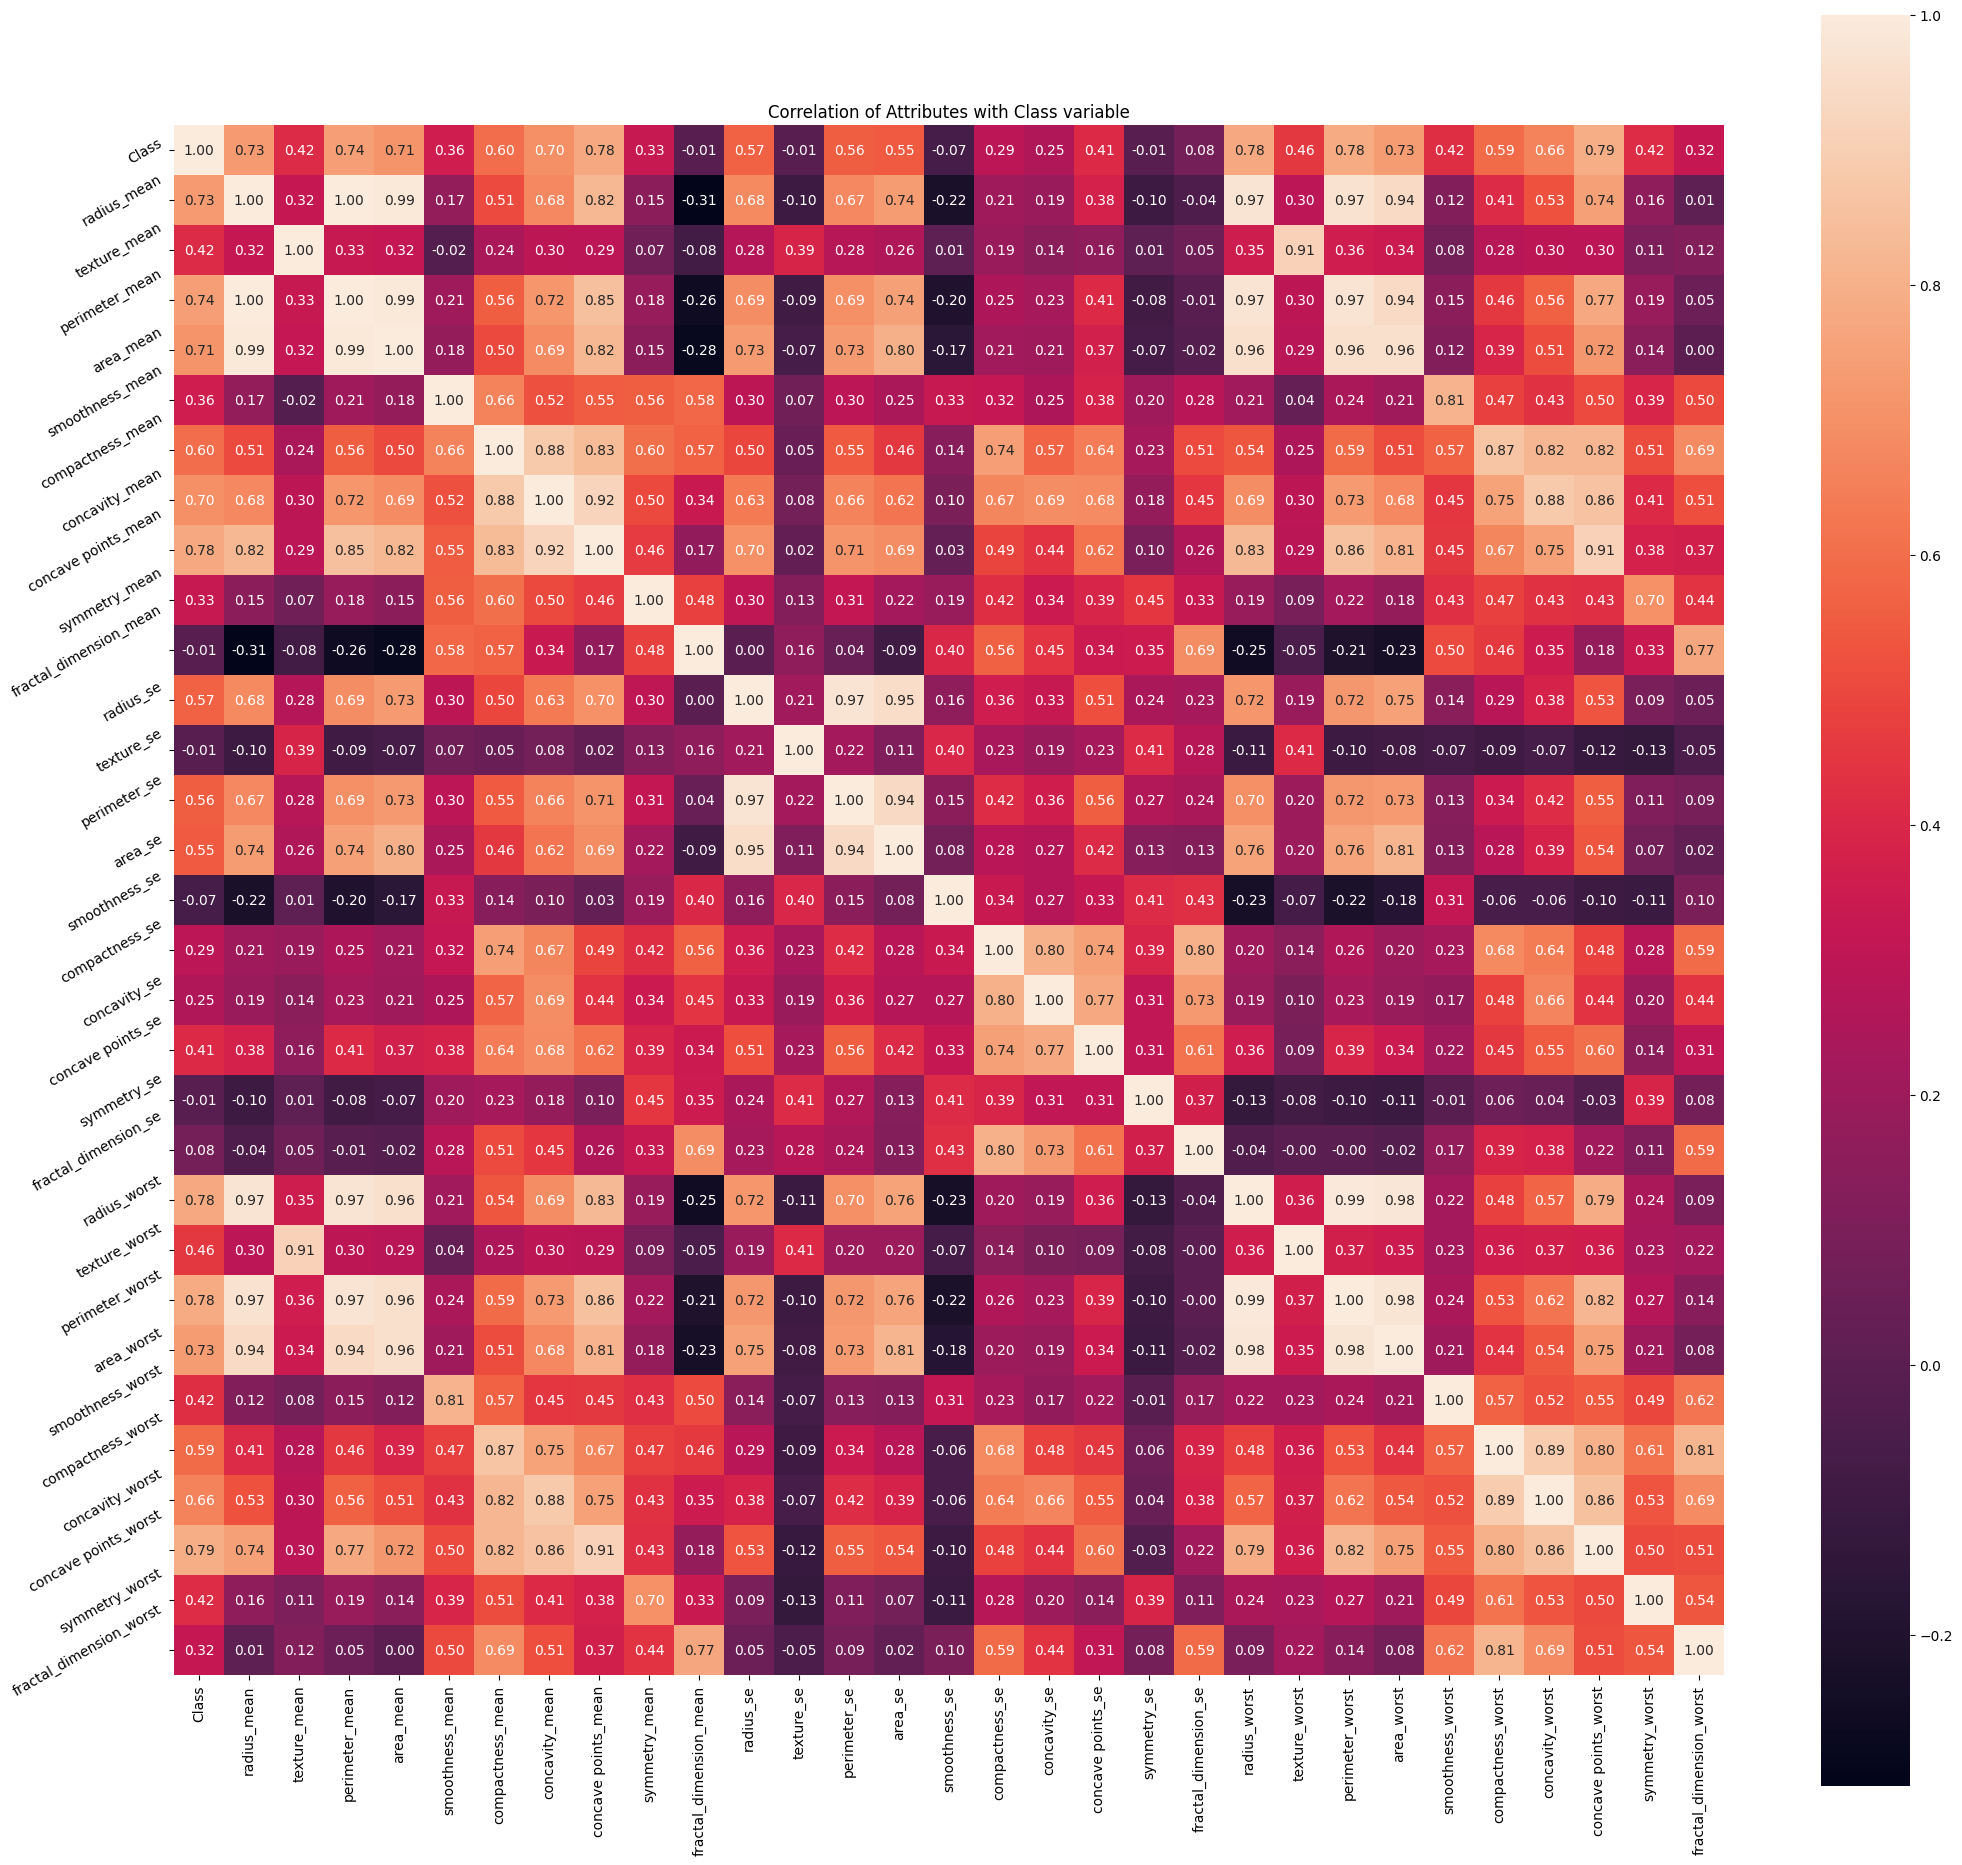

In [62]:
plt.figure(figsize=(25,23))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

### Interpretation


From the above correlation heat map, we can conclude that :-

1. `Class` is highly positive correlated with `Uconcave points_worst      perimeter_worst            concave points_mean   radius_worst              perimeter_mean         area_worst                radius_mean             area_mean    `. (correlation coefficient = 0.75).

2. `Class` is tương quan dương with 
`concavity_mean`             0.696360,
`concavity_worst`            0.65,
`compactness_mean  `         0.59,
`compactness_worst `         0.59,
`radius_se `                0.56,
`perimeter_se `              0.55,
`area_se  s`              0.54,

3. `Class` mối tương quan dương yếu `texture_worst`              0.456903
`smoothness_worst`           0.421465
`symmetry_worst `            0.416294
`texture_mean`               0.415185
`concave points_se `         0.408042
`smoothness_mean`            0.358560
`symmetry_mean`              0.330499
`fractal_dimension_worst `   0.323872
`compactness_se`             0.292999
4. The `Texture` có mối tương quan dương yếu với tất cả các biến còn lại (correlation coefficient < 0.50).

# **9. Declare feature vector and target variable** <a class="anchor" id="9"></a> Xác định vector đặc trưng và biến mục tiêu


[Table of Contents](#0.1)

In [63]:
X = df.drop(['Class'], axis=1)

y = df['Class']

Dòng code này thực hiện việc tách dữ liệu thành:
	
	•	X (vector đặc trưng): Chứa tất cả các biến độc lập (các đặc trưng) trong tập dữ liệu, ngoại trừ cột Class.
	
	•	y (biến mục tiêu): Chứa giá trị của cột Class, tức là nhãn cần dự đoán (1: lành tính, 2: ác tính).

Cụ thể:
	
	•	df.drop(['Class'], axis=1): Xóa cột Class khỏi DataFrame và lưu phần còn lại vào X.

	•	df['Class']: Lấy riêng cột Class để làm biến mục tiêu y.

# **10. Split data into separate training and test set** <a class="anchor" id="10"></a>

[Table of Contents](#0.1)

In [64]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [65]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((455, 30), (114, 30))

# **11. Feature Engineering** <a class="anchor" id="11"></a>

[Table of Contents](#0.1)


**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power (tăng khả năng dự đoán). I will carry out(thực hiện) feature engineering on different types of variables.


In [66]:
# check data types in X_train

X_train.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

### Engineering missing values in variables



In [67]:
# check missing values in numerical variables in X_train

X_train.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [68]:
# check missing values in numerical variables in X_test

X_test.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

We can see that there are no missing values in X_train and X_test.

In [70]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
338,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,...,11.16,26.84,71.98,384.0,0.1402,0.14020,0.1055,0.06499,0.2894,0.07664
427,10.80,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.05977,...,12.76,32.04,83.69,489.5,0.1303,0.16960,0.1927,0.07485,0.2965,0.07662
406,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,17.71,19.58,115.90,947.9,0.1206,0.17220,0.2310,0.11290,0.2778,0.07012
96,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.0498,0.05882,0.2227,0.07376
490,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,...,14.17,31.99,92.74,622.9,0.1256,0.18040,0.1230,0.06335,0.3100,0.08203


In [71]:
X_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,16.41,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.35,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
439,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,14.91,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710
298,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169


We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called `feature scaling`(chuẩn hóa đặc trưng). I will do it as follows.

# **12. Feature Scaling** <a class="anchor" id="12"></a>

[Table of Contents](#0.1)

In [72]:
cols = X_train.columns

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [74]:
# Chuyển lại thành DataFrame
X_train = pd.DataFrame(X_train, columns=[cols])

In [75]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [76]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-1.150365,-0.390642,-1.128550,-0.958764,0.310984,-0.595995,-0.802596,-0.802490,0.294539,0.094251,...,-1.043176,0.213533,-1.036045,-0.848808,0.342499,-0.730097,-0.812321,-0.757984,-0.016148,-0.385034
1,-0.937990,0.680514,-0.948201,-0.821525,-0.609636,-0.909867,-0.660669,-0.898716,0.754935,-0.425471,...,-0.715654,1.066842,-0.689922,-0.668697,-0.095537,-0.537866,-0.375048,-0.606870,0.096690,-0.386158
2,0.574121,-1.033336,0.513941,0.408586,-0.106161,-0.363019,-0.417990,-0.088446,-0.271820,-0.575221,...,0.297615,-0.977818,0.262137,0.113888,-0.524724,-0.520866,-0.182989,-0.023719,-0.200502,-0.751443
3,-0.547220,-0.316022,-0.577622,-0.566615,0.586662,-0.649331,-0.805298,-0.500065,0.331078,0.540567,...,-0.701325,-0.757927,-0.735737,-0.658966,-0.816748,-1.034921,-1.091633,-0.852545,-1.076186,-0.546883
4,-0.527398,0.791240,-0.561563,-0.523571,-1.051446,-1.017532,-0.905149,-0.935806,-0.969721,-0.426939,...,-0.427026,1.058637,-0.422423,-0.440955,-0.303494,-0.467251,-0.724565,-0.783118,0.311240,-0.082129


We now have `X_train` sẵn sàng để đưa vào bộ phân loại Logistic Regression. Tôi sẽ thực hiện như sau.

# **13. Fit K Neighbours Classifier to the training eet** <a class="anchor" id="13"></a>

[Table of Contents](#0.1)

In [114]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)


# fit the model to the training set
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

# **14. Predict test-set results** <a class="anchor" id="14"></a>

[Table of Contents](#0.1)

In [78]:
y_pred = knn.predict(X_test)

y_pred

array([4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4,
       2, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2,
       2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2,
       4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2,
       2, 4, 4, 2])

### predict_proba method

**predict_proba** method gives the probabilities for the target variable(2 and 4) in this case, dưới dạng mảng.

`2 ung thư lành tính (benign cancer).` and `4 là xác suất của ung thư ác tính (malignant cancer).`

In [115]:
#Xác suất để kết quả là 2 - ung thư lành tính

knn.predict_proba(X_test)[:,0]

array([0.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 1.        , 0.66666667, 0.66666667,
       0.33333333, 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       0.        , 1.        , 0.66666667, 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.33333333, 0.        , 1.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.66666667, 0.        , 1.        , 0.66666667, 0.     


	Ý nghĩa của từng giá trị trong mảng
	•	1.0 → Mẫu được dự đoán gần như chắc chắn là lành tính (Benign).
	•	0.0 → Mẫu được dự đoán gần như chắc chắn là ác tính (Malignant).
	•	0.66666667 (≈ 2/3) → Có 66.7% khả năng là lành tính, nhưng vẫn có xác suất 33.3% là ác tính.
	•	0.33333333 (≈ 1/3) → Có 33.3% khả năng là lành tính, nhưng phần lớn khả năng (66.7%) là ác tính.
💡 Tóm lại: Nếu trong 3 láng giềng:
	•	2 là lành tính (B), 1 là ác tính (M) → Xác suất là 2/3 = 0.6667 cho lành tính, 1/3 = 0.3333 cho ác tính.
	•	1 là lành tính (B), 2 là ác tính (M) → Xác suất là 1/3 = 0.3333 cho lành tính, 2/3 = 0.6667 cho ác tính.


In [116]:
# probability of getting output as 4 - malignant cancer

knn.predict_proba(X_test)[:,1]

array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 0.        , 0.33333333, 0.33333333,
       0.66666667, 0.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.33333333, 0.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.66666667, 1.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 0.        ,
       0.33333333, 1.        , 0.        , 0.33333333, 1.     

# **15. Check accuracy score** <a class="anchor" id="15"></a>

[Table of Contents](#0.1)

In [117]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9561


Here, **y_test**  là các nhãn lớp thực tế and **y_pred** are the các nhãn lớp được mô hình dự đoán trên tập kiểm tra.

### Compare the train-set and test-set accuracy


Now, I will compare the tập huấn luyện và tập kiểm tra để kiểm tra xem mô hình có bị overfitting hay không.

In [118]:
y_pred_train = knn.predict(X_train)

In [83]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9824


### Check for overfitting and underfitting

In [119]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9824
Test set score: 0.9561


The training-set accuracy score is 0.9824 while the test-set accuracy to be 0.9561. Hai giá trị này khá tương đồng, vì vậy không có dấu hiệu của overfitting. 


### Compare model accuracy with null accuracy


Vậy, độ chính xác của mô hình là 0.9561. Tuy nhiên, chúng ta không thể khẳng định mô hình rất tốt chỉ dựa vào độ chính xác này. Chúng ta cần so sánh nó với **null accuracy**.

Null accuracy là độ chính xác đạt được khi luôn dự đoán lớp xuất hiện nhiều nhất.

Vì vậy, trước tiên, chúng ta cần kiểm tra phân bố lớp trong tập kiểm tra.

In [120]:
# check class distribution in test set

y_test.value_counts()

Class
2    67
4    47
Name: count, dtype: int64

Chúng ta có thể thấy rằng số lần xuất hiện của lớp phổ biến nhất là 67. Vì vậy, chúng ta có thể tính null accuracy bằng cách lấy 67 chia cho tổng số mẫu trong tập kiểm tra.

In [121]:
# check null accuracy score

null_accuracy = (67/(67+47))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5877


We can see that our model accuracy score is 0.9561 but null accuracy score is 0.5877. Do đó, chúng ta có thể kết luận rằng mô hình K Nearest Neighbors đang hoạt động rất tốt trong việc dự đoán nhãn lớp.

# **16. Rebuild kNN Classification model using different values of k** <a class="anchor" id="16"></a>

[Table of Contents](#0.1)


I have build the kNN classification model using k=3. Now, I will increase the value of k and see its effect on accuracy.

### Rebuild kNN Classification model using k=5

In [122]:
# instantiate the model with k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn_5.fit(X_train, y_train)


# predict on the test-set
y_pred_5 = knn_5.predict(X_test)


print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.9561


### Rebuild kNN Classification model using k=6

In [123]:
# instantiate the model with k=6
knn_6 = KNeighborsClassifier(n_neighbors=6)


# fit the model to the training set
knn_6.fit(X_train, y_train)


# predict on the test-set
y_pred_6 = knn_6.predict(X_test)


print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))

Model accuracy score with k=6 : 0.9561


### Rebuild kNN Classification model using k=7

In [89]:
# instantiate the model with k=7
knn_7 = KNeighborsClassifier(n_neighbors=7)


# fit the model to the training set
knn_7.fit(X_train, y_train)


# predict on the test-set
y_pred_7 = knn_7.predict(X_test)


print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.9561


### Rebuild kNN Classification model using k=8

In [90]:
# instantiate the model with k=8
knn_8 = KNeighborsClassifier(n_neighbors=8)


# fit the model to the training set
knn_8.fit(X_train, y_train)


# predict on the test-set
y_pred_8 = knn_8.predict(X_test)


print('Model accuracy score with k=8 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_8)))

Model accuracy score with k=8 : 0.9561


### Rebuild kNN Classification model using k=9

In [128]:
# instantiate the model with k=9
knn_9 = KNeighborsClassifier(n_neighbors=9)


# fit the model to the training set
knn_9.fit(X_train, y_train)


# predict on the test-set
y_pred_9 = knn_9.predict(X_test)


print('Model accuracy score with k=9 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_9)))

Model accuracy score with k=2 : 0.9474


### Interpretation


	1.	Với k từ 3 → 8
	•	Model accuracy score = 0.9561 (95.61%)
	•	Điều này cho thấy trong khoảng giá trị này, mô hình hoạt động ổn định và không bị ảnh hưởng nhiều bởi sự thay đổi của k.
	•	Có thể do tập dữ liệu đủ lớn và có cấu trúc tốt, nên việc chọn k từ 3 đến 8 không làm thay đổi đáng kể hiệu suất.

    
	2.	Với k = 9
	•	Model accuracy score giảm còn 0.9474 (94.74%)
	•	Khi tăng k lên 9, độ chính xác giảm nhẹ (từ 95.61% xuống 94.74%).
	•	Điều này có thể do:
	•	Mô hình trở nên quá tổng quát: Khi k tăng, mô hình xem xét nhiều điểm lân cận hơn, làm giảm độ nhạy với các mẫu cận biên và có thể làm mất một số thông tin quan trọng.
	•	Giới hạn về phân bố dữ liệu: Nếu dữ liệu không đồng nhất, việc xét quá nhiều hàng xóm có thể dẫn đến sai sót trong phân loại.

Kết luận

🔹 Khoảng k từ 3 đến 8 là tối ưu vì giữ độ chính xác cao và ổn định.
🔹 K = 9 có thể quá cao và làm mô hình hoạt động kém hơn.

Dựa trên phân tích trên, chúng ta có thể kết luận rằng độ chính xác của mô hình phân loại là rất tốt. Mô hình đang hoạt động hiệu quả trong việc dự đoán các nhãn lớp.

Tuy nhiên, độ chính xác không phản ánh được sự phân bố thực tế của các giá trị. Nó cũng không cung cấp thông tin về loại lỗi mà bộ phân loại đang mắc phải.

Chúng ta có một công cụ khác có thể giúp giải quyết vấn đề này, đó là Ma trận nhầm lẫn (Confusion Matrix).

# **17. Confusion matrix** <a class="anchor" id="17"></a>

[Table of Contents](#0.1)


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – Xảy ra khi mô hình dự đoán một quan sát thuộc về một lớp nào đó và thực tế quan sát đó thực sự thuộc về lớp đó


**True Negatives (TN)** – Xảy ra khi mô hình dự đoán một quan sát không thuộc về một lớp nào đó và thực tế quan sát đó thực sự không thuộc về lớp đó.


**False Positives (FP)** – Xảy ra khi mô hình dự đoán một quan sát thuộc về một lớp nào đó nhưng thực tế quan sát đó không thuộc về lớp đó. Đây là lỗi Loại I . **Type I error.**



**False Negatives (FN)** –Xảy ra khi mô hình dự đoán một quan sát không thuộc về một lớp nào đó nhưng thực tế quan sát đó lại thuộc về lớp đó. Đây là một lỗi nghiêm trọng và được gọi là Lỗi Loại II **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [124]:
# Print the Confusion Matrix with k =3 and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[67  0]
 [ 5 42]]

True Positives(TP) =  67

True Negatives(TN) =  42

False Positives(FP) =  0

False Negatives(FN) =  5


Nhận xét
	•	Mô hình không có False Positives (FP = 0), nghĩa là không có trường hợp nào thực sự ác tính mà bị chẩn đoán nhầm thành lành tính → rất quan trọng trong chẩn đoán ung thư.

	•	Tuy nhiên, có 5 False Negatives (FN = 5), tức là có 5 ca thực sự lành tính nhưng bị dự đoán nhầm là ác tính.
    
	•	Mô hình đạt độ chính xác cao (95.61%), Precision và Specificity đều đạt 100%, nhưng Recall (93.06%) chưa hoàn hảo.

In [129]:
# Print the Confusion Matrix with k =7 and slice it into four pieces

cm_7 = confusion_matrix(y_test, y_pred_7)

print('Confusion matrix\n\n', cm_7)

print('\nTrue Positives(TP) = ', cm_7[0,0])

print('\nTrue Negatives(TN) = ', cm_7[1,1])

print('\nFalse Positives(FP) = ', cm_7[0,1])

print('\nFalse Negatives(FN) = ', cm_7[1,0])

Confusion matrix

 [[67  0]
 [ 6 41]]

True Positives(TP) =  67

True Negatives(TN) =  41

False Positives(FP) =  0

False Negatives(FN) =  6


Giống K =3

<Axes: >

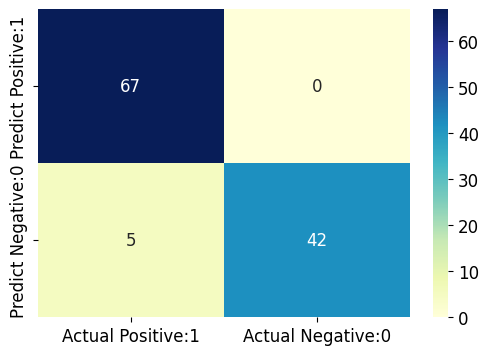

In [126]:
# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm_7, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# **18. Classification metrices** <a class="anchor" id="18"></a>

[Table of Contents](#0.1)

### Classification Report


**Classification report** là một cách khác để đánh giá hiệu suất của mô hình phân loại. Nó hiển thị các chỉ số **precision**, **recall**, **f1** and **support** ủa mô hình.. Tôi sẽ mô tả các thuật ngữ này chi tiết hơn ở phần sau.

We can print a classification report as follows:-

In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.93      1.00      0.96        67
           4       1.00      0.89      0.94        47

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### Classification accuracy

In [96]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [127]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.9561


### Classification error

In [98]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.0439


### Precision


**Precision** có thể được định nghĩa là phần trăm kết quả dương tính được dự đoán chính xác trên tổng số kết quả dương tính được dự đoán. Nó được tính bằng tỷ lệ giữa số lượng dương tính thực (TP) và tổng số dương tính thực và dương tính giả (TP + FP). 


So, **Precision** Xác định tỷ lệ kết quả dương tính được dự đoán chính xác. Nó quan tâm nhiều hơn đến lớp dương tính so với lớp âm tính.



Mathematically, `precision` can be defined as the ratio of `TP to (TP + FP)`.


In [99]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 1.0000


### Recall

Recall (hay còn gọi là **Độ nhạy** hoặc **Sensitivity**) được định nghĩa là **tỷ lệ dự đoán đúng các trường hợp dương tính so với tổng số trường hợp dương tính thực tế**.

Nói cách khác, **Recal**l đo lường **tỷ lệ phần trăm** các kết quả **dương tính thực tế** được mô hình dự đoán chính xác.

Về mặt toán học, **Recall** được tính theo công thức:


\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}




In [100]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9306


### True Positive Rate


**True Positive Rate** is synonymous with **Recall**.


In [101]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9306


### False Positive Rate

In [102]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0000


### Specificity

In [103]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 1.0000


**Mô hình có độ chính xác cao (Accuracy = 95.61%).**

✅ Không có cảnh báo sai (False Positive Rate = 0%), rất tốt cho các bài toán như bảo mật hoặc kiểm tra chất lượng.

✅ Recall cao (93.06%), tức là mô hình phát hiện đúng hầu hết các trường hợp cần thiết.

📌 Cân nhắc thêm:

✅Nếu bài toán yêu cầu phát hiện tất cả các trường hợp dương tính, bạn có thể tối ưu Recall hơn nữa.

✅Nếu Recall cao nhưng FPR không phải luôn bằng 0 trên các tập dữ liệu khác, cần kiểm tra mô hình với nhiều bộ dữ liệu hơn để đánh giá tính tổng quát.

### f1-score


**f1-score**  là trung bình điều hòa có trọng số giữa **Precision** và **Recall**.

Giá trị **F1-score** tốt nhất là 1.0 (mô hình hoàn hảo), và giá trị thấp nhất là 0.0.

Vì **F1-score** là trung bình điều hòa của **Precision** và **Recall**, nên nó luôn thấp hơn độ chính xác (Accuracy) vì nó kết hợp cả hai yếu tố này trong quá trình tính toán.

**F1-score trung bình** có trọng số nên được sử dụng để so sánh các **mô hình phân loại** thay vì chỉ dựa vào độ** chính xác tổng thể** (Global Accuracy).


### Support


**Support** Là số lần xuất hiện thực tế của một lớp trong tập dữ liệu của chúng ta.

### Adjusting the classification threshold level

In [104]:
#Lấy 10 giá trị đầu tiên của xác suất dự đoán

y_pred_prob = knn.predict_proba(X_test)[0:10]

y_pred_prob

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Nếu một dòng có dạng [1., 0.], nghĩa là mô hình chắc chắn 100% rằng điểm đó thuộc lớp 2.

Nếu một dòng có dạng [0., 1.], nghĩa là mô hình chắc chắn 100% rằng điểm đó thuộc lớp 4.

### Observations


- Trong mỗi hàng, tổng hai giá trị luôn bằng 1..


- Có 2 cột tương ứng với 2 lớp: - 2 and 4. 


    - Class 2 - Xác suất dự đoán rằng ung thư lành tính.
    
    - Class 4 - Xác suất dự đoán rằng ung thư ác tính.
        
    
- Tầm quan trọng của xác suất dự đoán

    - Chúng ta có thể sắp xếp các mẫu theo xác suất mắc ung thư lành tính hoặc ác tính.


- predict_proba process

    - Dự đoán xác suất của từng lớp    
    
    - Chọn lớp có xác suất cao nhất làm kết quả dự đoán   
    
    
- Classification threshold level

    - Ngưỡng mặc định để phân loại là 0.5.   
    
    - Nếu xác suất của lớp 4 (ung thư ác tính) > 0.5, dự đoán là ung thư ác tín    
    
    - Nếu xác suất của lớp 2 (ung thư lành tính) < 0.5, dự đoán là ung thư lành tính.    
    


In [105]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - benign cancer (2)', 'Prob of - malignant cancer (4)'])

y_pred_prob_df

,Prob of - benign cancer (2),Prob of - malignant cancer (4)
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


In [130]:
#trích xuất xác suất dự đoán của lớp 4 (Malignant cancer) cho 10 mẫu đầu tiên trong tập kiểm tra (X_test).

knn.predict_proba(X_test)[0:10, 1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [131]:
# store the predicted probabilities for class 4 - Probability of malignant cancer

y_pred_1 = knn.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

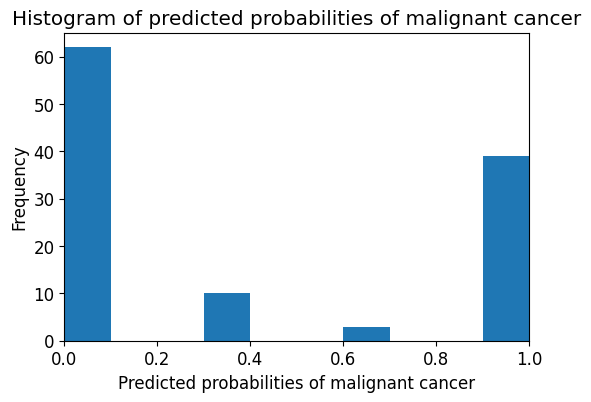

In [132]:
# plot histogram of predicted probabilities


# adjust figure size
plt.figure(figsize=(6,4))


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred_1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of malignant cancer')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of malignant cancer')
plt.ylabel('Frequency')

### Observations


- Chúng ta có thể thấy rằng biểu đồ histogram trên bị lệch phải (positively skewed).


- Cột đầu tiên cho chúng ta biết rằng có khoảng 80 quan sát với xác suất bằng 0 đối với ung thư ác tính.


- Chỉ có một số ít quan sát có xác suất lớn hơn 0.5.


- Do đó, chỉ một số ít quan sát được dự đoán là có ung thư ác tính.


### Comments


- Trong các bài toán phân loại nhị phân, ngưỡng 0.5 được sử dụng mặc định để chuyển đổi xác suất dự đoán thành nhãn phân loại.


- Ngưỡng này có thể được điều chỉnh để tăng độ nhạy **(sensitivity)** hoặc độ đặc hiệu **(specificity)**.


- Độ nhạy và độ đặc hiệu có mối quan hệ nghịch đảo – khi tăng một chỉ số, chỉ số còn lại sẽ giảm và ngược lại.


- Việc điều chỉnh ngưỡng phân loại nên là một trong những bước cuối cùng trong quá trình xây dựng mô hình.

# **19. ROC-AUC** <a class="anchor" id="19"></a>

[Table of Contents](#0.1)



### ROC Curve


Một công cụ trực quan để **đánh giá hiệu suất** của mô hình phân loại là đường cong ROC **(Receiver Operating Characteristic Curve)**. Đây là biểu đồ hiển thị **hiệu suất** của mô hình **phân loại** ở các mức **ngưỡng phân loại** khác nhau.



Đường cong ROC (ROC Curve) vẽ **True Positive Rate (TPR)** - Độ nhạy **(Recall)** so với **False Positive Rate (FPR)** - Tỷ lệ dương tính giả tại các mức ngưỡng khác nhau.




**True Positive Rate (TPR)** is also called **Recall**. Nó được định nghĩa là tỷ lệ của **TP to (TP + FN)**.





**False Positive Rate (FPR)** Nó được định nghĩa là tỷ lệ của **FP to (FP + TN)**.




Trong đường cong ROC, chúng ta sẽ tập trung vào **TPR** (Tỷ lệ Dương tính Thực) và **FPR** (Tỷ lệ Dương tính Giả) tại một điểm cụ thể. Điều này giúp đánh giá tổng quan **hiệu suất của đường cong ROC**, bao gồm **TPR và FPR** ở các mức ngưỡng phân loại khác nhau.

Do đó, một đường cong ROC sẽ biểu diễn **TPR so với FPR** ở các mức ngưỡng khác nhau. Nếu chúng ta **giảm mức ngưỡng phân loại**, có thể dẫn đến nhiều mục được phân loại là **dương tính hơn**, đồng thời làm **tăng cả số lượng Dương tính Thực (TP)** và **Dương tính Giả (FP).**




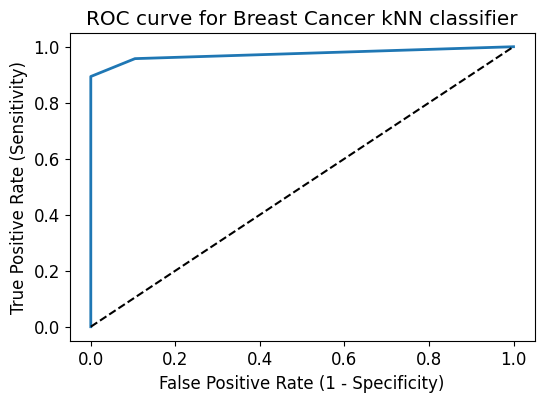

In [109]:
# plot ROC Curve

from sklearn.metrics import roc_curve

## Tính toán FPR, TPR và ngưỡng phân loại
fpr, tpr, thresholds = roc_curve(y_test, y_pred_1, pos_label=4)

plt.figure(figsize=(6,4))

## Vẽ đường cong ROC
plt.plot(fpr, tpr, linewidth=2)

# Vẽ đường chéo tham chiếu (đường phân loại ngẫu nhiên)
plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

## Tiêu đề và nhãn trụcb
plt.title('ROC curve for Breast Cancer kNN classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


✅ Nếu đường ROC gần góc trên bên trái (TPR cao, FPR thấp) → Mô hình hoạt động tốt.

⚠️ Nếu ROC gần đường chéo y = x → Mô hình không phân loại tốt hơn đoán ngẫu nhiên.

❌ Nếu ROC thấp hơn đường chéo → Mô hình đang hoạt động tệ hơn đoán mò.

Đường cong ROC giúp chúng ta chọn một ngưỡng phân loại cân bằng giữa độ nhạy **(sensitivity)** và độ đặc hiệu **(specificity)** phù hợp với từng bối cảnh cụ thể.

### ROC  AUC


**ROC AUC** stands for **Receiver Operating Characteristic - Area Under Curve**. một kỹ thuật để so sánh hiệu suất của các mô hình phân loại. Trong kỹ thuật này, chúng ta đo **diện tích dưới đường cong (AUC)**. 


Một mô hình phân loại hoàn hảo sẽ có **ROC AUC = 1**

Một mô hình phân loại ngẫu nhiên sẽ có **ROC AUC = 0.5**

Do đó, **ROC AUC** thể hiện tỷ lệ phần trăm của đồ thị ROC nằm bên dưới đường cong.

In [110]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9732


### Interpretation


Chỉ số ROC AUC = 0.9732 cho thấy mô hình phân loại hoạt động rất tốt.

**Gần bằng 1** → Mô hình có khả năng phân biệt tốt giữa hai lớp (benign & malignant).

**Cao hơn 0.9** → Mô hình đạt độ chính xác rất cao trong việc phân loại ung thư vú.


In [111]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(knn_7, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9818


🎯 Ý nghĩa của Cross-Validated ROC AUC
	
    •	ROC AUC (Area Under the Curve) đo lường khả năng mô hình phân biệt giữa hai lớp (2 và 4 trong trường hợp này).
	
    •	Cross-validation (cv=5) giúp đánh giá mô hình trên 5 tập con khác nhau để đảm bảo tính tổng quát.
	
    •	Kết quả trung bình giúp tránh overfitting và cung cấp đánh giá chính xác hơn về hiệu suất mô hình.

### Interpretation

Giá trị ROC AUC sau khi Cross Validation rất gần với 1. Do đó, có thể kết luận rằng mô hình KNN thực sự là một mô hình rất tốt.

# **20. k-fold Cross Validation** <a class="anchor" id="20"></a>

[Table of Contents](#0.1)


Trong phần này, tôi sẽ áp dụng kỹ thuật k-fold Cross Validation để cải thiện hiệu suất mô hình. **Cross-validation** là một phương pháp thống kê giúp **đánh giá khả năng tổng quát hóa của mô hình**. Phương pháp này ổn định và toàn diện hơn so với việc sử dụng train-test split để đánh giá hiệu suất mô hình

In [112]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn_7, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.93478261 0.93478261 0.97826087 0.95652174 0.95652174 0.95555556
 1.         0.95555556 0.97777778 0.93333333]


We can summarize the cross-validation accuracy by calculating its mean.

In [113]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9583


### Interpretation


Giá trị trung bình: (scores.mean() ≈ 0.9587) → Độ chính xác tổng thể khá cao (~95.87%).

Độ lệch chuẩn thấp (scores.std() ≈ 0.0226) → Mô hình khá ổn định.

     Kết luận:

✅ Mô hình kNN hoạt động tốt với độ chính xác cao (~96%).

✅ Không có outliers rõ ràng, không có fold nào quá thấp so với trung bình.

✅ Ổn định: Các giá trị không dao động quá lớn.

# **21. Results and Conclusion** <a class="anchor" id="21"></a>

[Table of Contents](#0.1)



1. Trong dự án này, tôi đã xây dựng mô hình phân loại kNN để xác định bệnh nhân mắc ung thư vú. Mô hình đạt hiệu suất rất tốt với độ chính xác 0.9786 khi k=7.

2.	Khi k=3, độ chính xác trên tập huấn luyện là 0.9821, trong khi độ chính xác trên tập kiểm tra là 0.9714. Hai giá trị này khá tương đồng, do đó không có dấu hiệu của overfitting.

3.	Tôi đã so sánh độ chính xác của mô hình (0.9714) với độ chính xác của mô hình ngẫu nhiên (0.6071). Kết quả cho thấy mô hình kNN hoạt động tốt trong việc dự đoán nhãn lớp.

4.	Mô hình ban đầu với k=3 có độ chính xác 0.9714. Khi tăng lên k=5, độ chính xác vẫn giữ nguyên ở mức 0.9714. Tuy nhiên, khi tăng k lên 6, 7, 8 thì độ chính xác đạt 0.9786, cho thấy sự cải thiện hiệu suất. Khi k=9, độ chính xác giảm xuống 0.9714. Do đó, giá trị k tối ưu là 7.

5.	Mô hình kNN với k=7 cho kết quả dự đoán chính xác hơn và số lỗi ít hơn so với mô hình k=3, giúp cải thiện hiệu suất tổng thể.

6.	ROC AUC của mô hình tiến gần đến 1, chứng tỏ khả năng phân loại tốt giữa ung thư lành tính và ác tính.

7.	Sử dụng phương pháp cross-validation, mô hình đạt độ chính xác trung bình khoảng 96.46%.

8.	Nếu xem xét 10 điểm số từ cross-validation, ta thấy độ chính xác dao động từ 87.72% đến 100%. Điều này cho thấy mô hình phụ thuộc nhiều vào cách chia tập dữ liệu huấn luyện, có thể do kích thước tập dữ liệu nhỏ.

# **22. References** <a class="anchor" id="22"></a>

[Table of Contents](#0.1)

The work done in this project is inspired from following books and websites:-

1.	Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurélién Géron
2.	Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido
3.	Udemy course – Machine Learning – A Z by Kirill Eremenko and Hadelin de Ponteves
4.	https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
5.	https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
6.	http://dataaspirant.com/2016/12/23/k-nearest-neighbor-classifier-intro/
7.	https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/



So, now we will come to the end of this kernel.

I hope you find this kernel useful and enjoyable.

Your comments and feedback are most welcome.

Thank you

[Go to Top](#0)